In [1]:
import rasterio
import rasterio.features
import rasterio.warp
import rasterio.plot
from rasterio.mask import mask
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd

band2str = 'S2A_OPER_MSI_L1C_TL_MPS__20160714T235020_A005544_T10SEJ_B02.jp2'

In [32]:
%cd 
cropshape = gpd.read_file('GeoSpatial-Classification/Crops_2016/Crops_2016_26910.shp')


/home/rus


In [33]:
cropshape.crs = {"init": 'epsg:26910'}
cropshape = cropshape.to_crs('+proj=utm +zone=10 +ellps=WGS84 +datum=WGS84 +units=m +no_defs')
cropshape.crs

'+proj=utm +zone=10 +ellps=WGS84 +datum=WGS84 +units=m +no_defs'

In [49]:
    %cd Desktop/shared/S2A_OPER_PRD_MSIL1C_PDMC_20160715T044318_R113_V20160714T190130_20160714T190130.SAFE/GRANULE/S2A_OPER_MSI_L1C_TL_MPS__20160714T235020_A005544_T10SEJ_N02.04/IMG_DATA/

/shared/S2A_OPER_PRD_MSIL1C_PDMC_20160715T044318_R113_V20160714T190130_20160714T190130.SAFE/GRANULE/S2A_OPER_MSI_L1C_TL_MPS__20160714T235020_A005544_T10SEJ_N02.04/IMG_DATA


In [26]:
band2 = rasterio.open(band2str)

In [36]:
band2.bounds


bbox = [{'type':'Polygon','coordinates':[[(545000,4310040),(609780,4310040),(609780,4300020),(545000,4300020)]]}]

In [39]:
#fig,ax = plt.subplots(1,figsize=(7,7))
#bounds = rasterio.plot.plotting_extent(band2)
#rasterio.plot.show(band2,with_bounds=True, extent = bounds, ax=ax)
#cropshape.plot(ax = ax)

In [41]:
out_image, out_transform = mask(band2,bbox,crop = True)
trans = (out_transform[2], band2.transform[1], band2.transform[2],out_transform[5], band2.transform[4], band2.transform[5] )

/home/rus/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2963: FutureWarning: The value of this property will change in version 1.0. Please see https://github.com/mapbox/rasterio/issues/86 for details.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [42]:
a = band2.profile
a.update({'height':out_image.shape[1],'width':out_image.shape[2],'affine':out_transform,'transform':trans})

In [51]:
a

{'affine': Affine(10.0, 0.0, 545000.0,
        0.0, -10.0, 4310040.0),
 'blockxsize': 1024,
 'blockysize': 1024,
 'count': 1,
 'crs': CRS({'init': 'epsg:32610'}),
 'driver': 'JP2OpenJPEG',
 'dtype': 'uint16',
 'height': 1002,
 'nodata': None,
 'tiled': True,
 'transform': (545000.0, 10.0, 0.0, 4310040.0, 0.0, -10.0),
 'width': 6478}

/usr/local/lib/python3.5/dist-packages/rasterio/__init__.py:160: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  transform = guard_transform(transform)


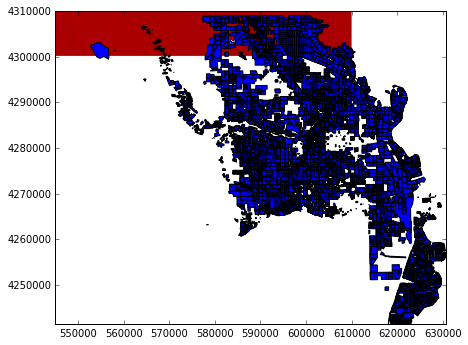

In [44]:
b = rasterio.open('q.tif', 'w', **a)
b.write(out_image)
b.close()
x = rasterio.open('q.tif')
x.bounds
fig,ax = plt.subplots(1,figsize=(7,7))
bounds = rasterio.plot.plotting_extent(x)
rasterio.plot.show(x,with_bounds=True, extent = bounds, ax=ax)
cropshape.plot(ax = ax)

In [48]:
%pwd

'/home/rus'

In [50]:
from os import listdir
files = listdir()
def xmler(i):
    return('xml' not in i)
xmler(files[1])
import numpy as np
correct_files = np.array(files)[np.array(list(map(xmler,files)))]
correct_files


array(['S2A_OPER_MSI_L1C_TL_MPS__20160714T235020_A005544_T10SEJ_B03.jp2',
       'S2A_OPER_MSI_L1C_TL_MPS__20160714T235020_A005544_T10SEJ_B08.jp2',
       'S2A_OPER_MSI_L1C_TL_MPS__20160714T235020_A005544_T10SEJ_B04.jp2',
       'S2A_OPER_MSI_L1C_TL_MPS__20160714T235020_A005544_T10SEJ_B11.jp2',
       'S2A_OPER_MSI_L1C_TL_MPS__20160714T235020_A005544_T10SEJ_B8A.jp2',
       'S2A_OPER_MSI_L1C_TL_MPS__20160714T235020_A005544_T10SEJ_B02.jp2',
       'S2A_OPER_MSI_L1C_TL_MPS__20160714T235020_A005544_T10SEJ_B01.jp2',
       'S2A_OPER_MSI_L1C_TL_MPS__20160714T235020_A005544_T10SEJ_B05.jp2',
       'S2A_OPER_MSI_L1C_TL_MPS__20160714T235020_A005544_T10SEJ_B06.jp2',
       'S2A_OPER_MSI_L1C_TL_MPS__20160714T235020_A005544_T10SEJ_B09.jp2',
       'S2A_OPER_MSI_L1C_TL_MPS__20160714T235020_A005544_T10SEJ_B07.jp2',
       'S2A_OPER_MSI_L1C_TL_MPS__20160714T235020_A005544_T10SEJ_B12.jp2',
       'S2A_OPER_MSI_L1C_TL_MPS__20160714T235020_A005544_T10SEJ_B10.jp2'], 
      dtype='<U71')

In [53]:
dataset = band2

/home/rus/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2963: FutureWarning: The value of this property will change in version 1.0. Please see https://github.com/mapbox/rasterio/issues/86 for details.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.5/dist-packages/rasterio/__init__.py:160: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  transform = guard_transform(transform)


BoundingBox(left=545000.0, bottom=4300020.0, right=609780.0, top=4310040.0)
BoundingBox(left=545000.0, bottom=4300020.0, right=609780.0, top=4310040.0)
BoundingBox(left=545000.0, bottom=4300020.0, right=609780.0, top=4310040.0)
BoundingBox(left=545000.0, bottom=4300020.0, right=609780.0, top=4310040.0)
BoundingBox(left=545000.0, bottom=4300020.0, right=609780.0, top=4310040.0)
BoundingBox(left=545000.0, bottom=4300020.0, right=609780.0, top=4310040.0)
BoundingBox(left=545000.0, bottom=4300020.0, right=609780.0, top=4310040.0)
BoundingBox(left=545000.0, bottom=4300020.0, right=609780.0, top=4310040.0)
BoundingBox(left=545000.0, bottom=4300020.0, right=609780.0, top=4310040.0)
BoundingBox(left=545000.0, bottom=4300020.0, right=609780.0, top=4310040.0)
BoundingBox(left=545000.0, bottom=4300020.0, right=609780.0, top=4310040.0)
BoundingBox(left=545000.0, bottom=4300020.0, right=609780.0, top=4310040.0)
BoundingBox(left=545000.0, bottom=4300020.0, right=609780.0, top=4310040.0)


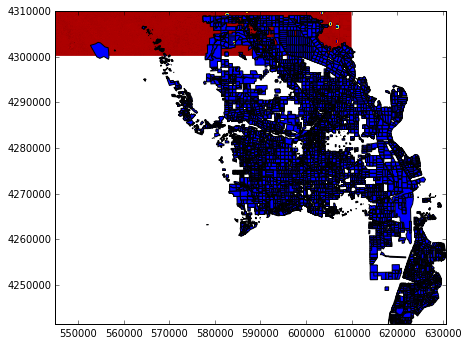

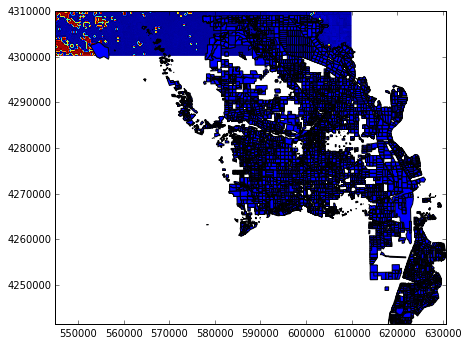

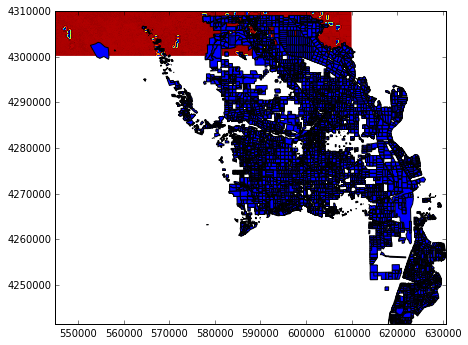

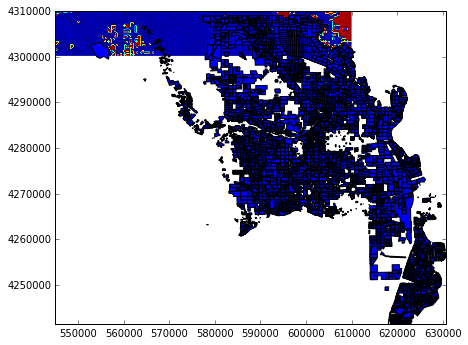

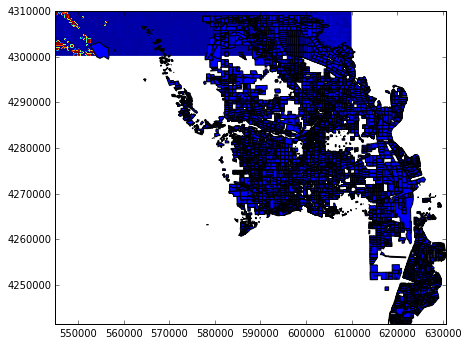

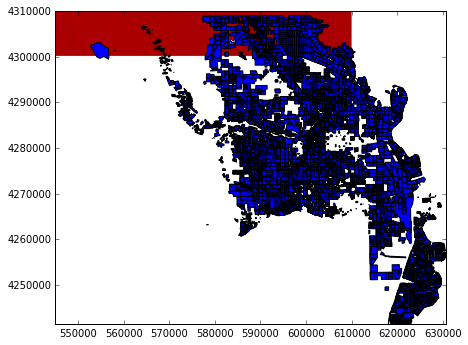

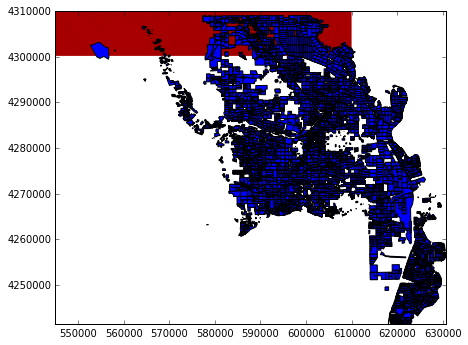

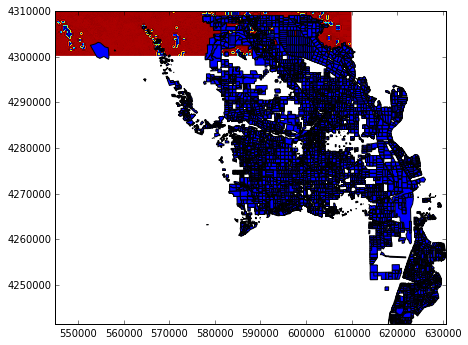

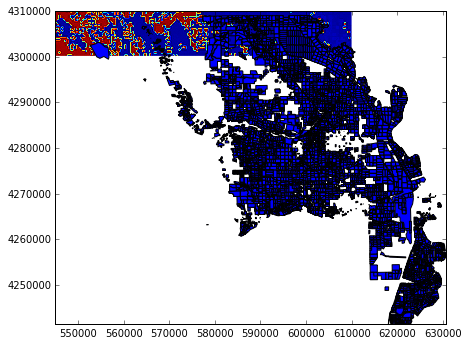

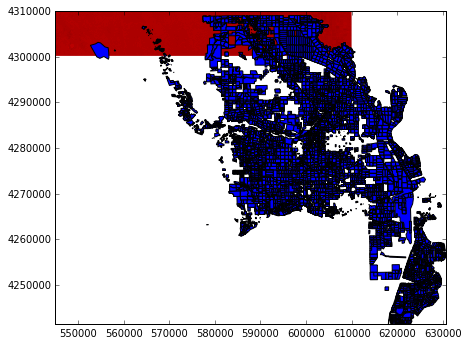

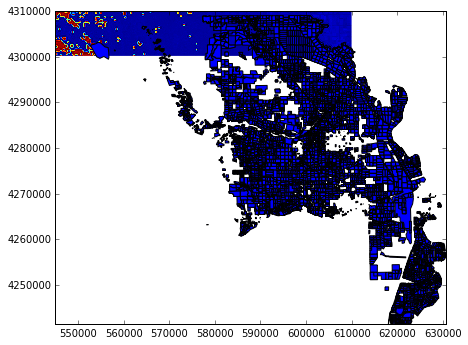

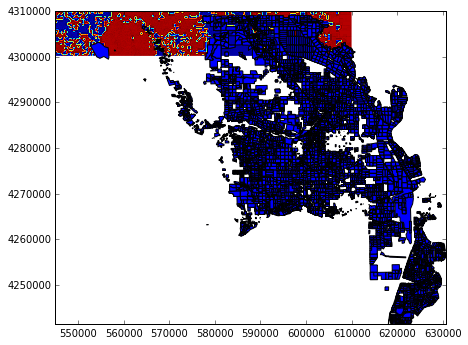

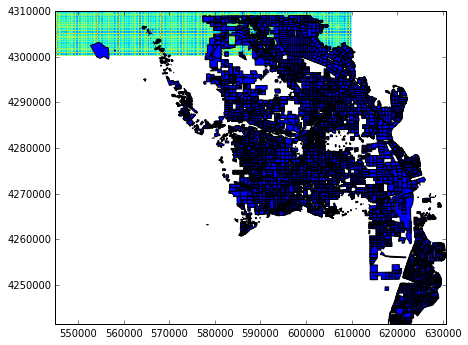

In [54]:
j = 0
for i in correct_files:
    j +=1
    dataset.close()
    dataset = rasterio.open(i)
    out_image, out_transform = mask(dataset,bbox,crop = True)
    trans = (out_transform[2], dataset.transform[1], dataset.transform[2],out_transform[5], dataset.transform[4], dataset.transform[5] )

    p = dataset.profile
    p.update({'height':out_image.shape[1],'width':out_image.shape[2],'affine':out_transform,'transform':trans})
    newname = str(j)+  i + 'tif'
    newname = newname.replace('jp2','')
    b = rasterio.open(newname, 'w', **a)
    b.write(out_image)
    b.close()

    x = rasterio.open(newname)
    print(x.bounds)



    fig,ax = plt.subplots(1,figsize=(7,7))
    bounds = rasterio.plot.plotting_extent(x)
    rasterio.plot.show(x,with_bounds=True, extent = bounds, ax=ax)
    cropshape.plot(ax = ax)

In [59]:
%cd S2A_OPER_MSI_L1C_TL_MPS__20160714T235020_A005544_T10SFH_N02.04/IMG_DATA/

[Errno 2] No such file or directory: 'S2A_OPER_MSI_L1C_TL_MPS__20160714T235020_A005544_T10SFH_N02.04/IMG_DATA/'
/shared/S2A_OPER_PRD_MSIL1C_PDMC_20160715T044318_R113_V20160714T190130_20160714T190130.SAFE/GRANULE/S2A_OPER_MSI_L1C_TL_MPS__20160714T235020_A005544_T10SFH_N02.04/IMG_DATA


In [80]:
band2str = 'S2A_OPER_MSI_L1C_TL_MPS__20160714T235020_A005544_T10SFH_B02.jp2'
band2 = rasterio.open(band2str)
band2.bounds
bbox = [{'type':'Polygon','coordinates':[[(631000,4240000),(609780,4240000),(609780,4300020),(631000,4300020)]]}]

In [73]:
bbox

[{'coordinates': [[(6310000, 4240000),
    (609780, 4240000),
    (609780, 4300020),
    (6310000, 4300020)]],
  'type': 'Polygon'}]

In [70]:
#fig,ax = plt.subplots(1,figsize=(7,7))
#bounds = rasterio.plot.plotting_extent(band2)
#rasterio.plot.show(band2,with_bounds=True, extent = bounds, ax=ax)
#cropshape.plot(ax = ax)

In [78]:
out_image.shape


(1, 6002, 10002)

In [81]:
out_image, out_transform = mask(band2,bbox,crop = True)
trans = (out_transform[2], band2.transform[1], band2.transform[2],out_transform[5], band2.transform[4], band2.transform[5] )

/home/rus/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2963: FutureWarning: The value of this property will change in version 1.0. Please see https://github.com/mapbox/rasterio/issues/86 for details.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [82]:
out_image, out_transform = mask(band2,bbox,crop = True)
trans = (out_transform[2], band2.transform[1], band2.transform[2],out_transform[5], band2.transform[4], band2.transform[5]
a = band2.profile
a.update({'height':out_image.shape[1],'width':out_image.shape[2],'affine':out_transform,'transform':trans})

In [79]:
a

{'affine': Affine(10.0, 0.0, 609780.0,
        0.0, -10.0, 4300020.0),
 'blockxsize': 1024,
 'blockysize': 1024,
 'count': 1,
 'crs': CRS({'init': 'epsg:32610'}),
 'driver': 'JP2OpenJPEG',
 'dtype': 'uint16',
 'height': 6002,
 'nodata': None,
 'tiled': True,
 'transform': (609780.0, 10.0, 0.0, 4300020.0, 0.0, -10.0),
 'width': 10002}

/usr/local/lib/python3.5/dist-packages/rasterio/__init__.py:160: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  transform = guard_transform(transform)


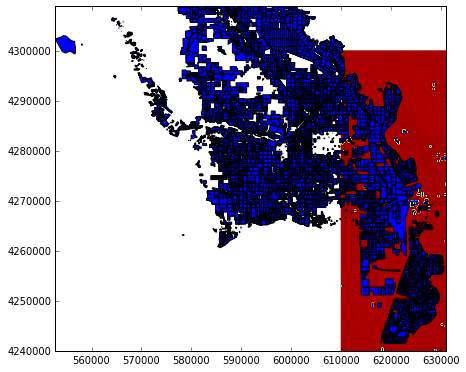

In [83]:
b = rasterio.open('q.tif', 'w', **a)
b.write(out_image)
b.close()
x = rasterio.open('q.tif')
x.bounds
fig,ax = plt.subplots(1,figsize=(7,7))
bounds = rasterio.plot.plotting_extent(x)
rasterio.plot.show(x,with_bounds=True, extent = bounds, ax=ax)
cropshape.plot(ax = ax)

In [84]:
from os import listdir
files = listdir()
def xmler(i):
    return('xml' not in i)
xmler(files[1])
import numpy as np
correct_files = np.array(files)[np.array(list(map(xmler,files)))]
correct_files
dataset = band2

/home/rus/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2963: FutureWarning: The value of this property will change in version 1.0. Please see https://github.com/mapbox/rasterio/issues/86 for details.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.5/dist-packages/rasterio/__init__.py:160: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  transform = guard_transform(transform)


BoundingBox(left=609780.0, bottom=4240000.0, right=631000.0, top=4300020.0)
BoundingBox(left=609780.0, bottom=4240000.0, right=631000.0, top=4300020.0)
BoundingBox(left=609780.0, bottom=4240000.0, right=631000.0, top=4300020.0)
BoundingBox(left=609780.0, bottom=4240000.0, right=631000.0, top=4300020.0)
BoundingBox(left=609780.0, bottom=4240000.0, right=631000.0, top=4300020.0)
BoundingBox(left=609780.0, bottom=4240000.0, right=631000.0, top=4300020.0)
BoundingBox(left=609780.0, bottom=4240000.0, right=631000.0, top=4300020.0)
BoundingBox(left=609780.0, bottom=4240000.0, right=631000.0, top=4300020.0)
BoundingBox(left=609780.0, bottom=4240000.0, right=631000.0, top=4300020.0)
BoundingBox(left=609780.0, bottom=4240000.0, right=631000.0, top=4300020.0)
BoundingBox(left=609780.0, bottom=4240000.0, right=631000.0, top=4300020.0)
BoundingBox(left=609780.0, bottom=4240000.0, right=631000.0, top=4300020.0)
BoundingBox(left=609780.0, bottom=4240000.0, right=631000.0, top=4300020.0)
BoundingBox(

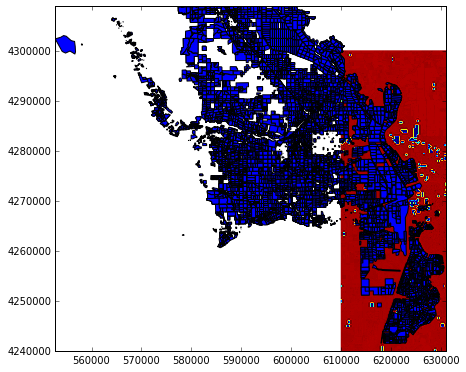

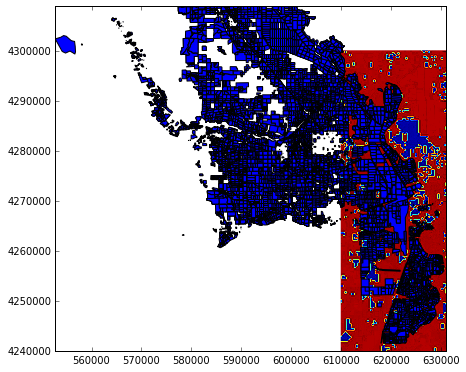

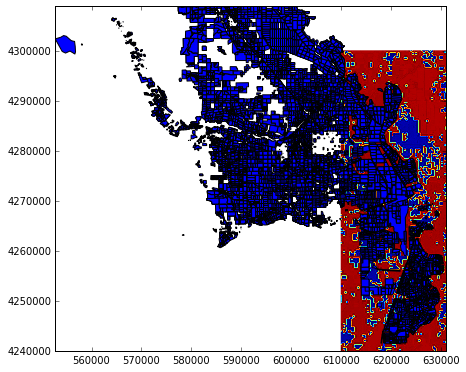

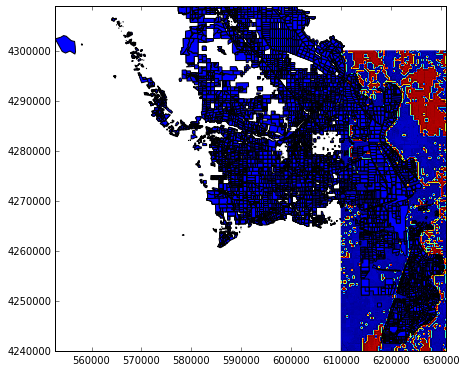

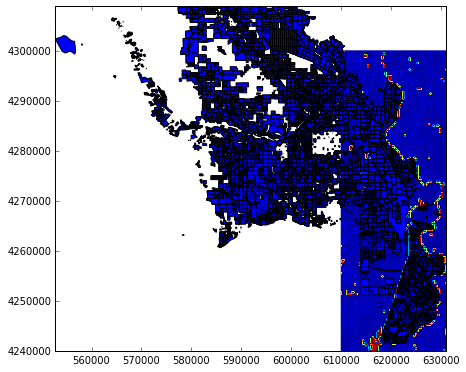

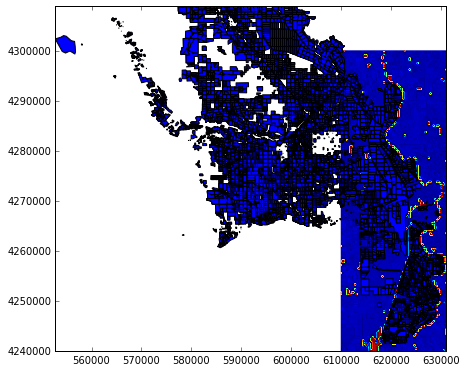

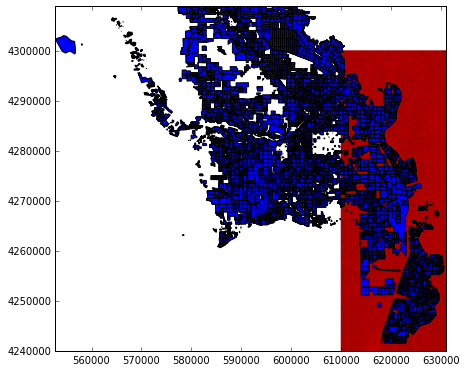

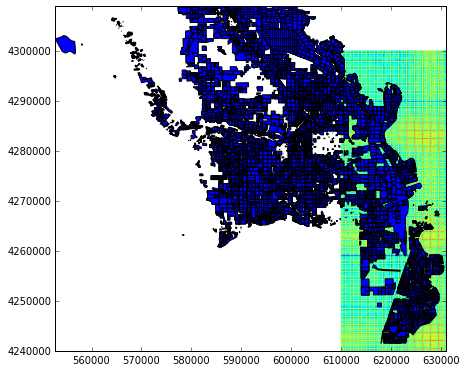

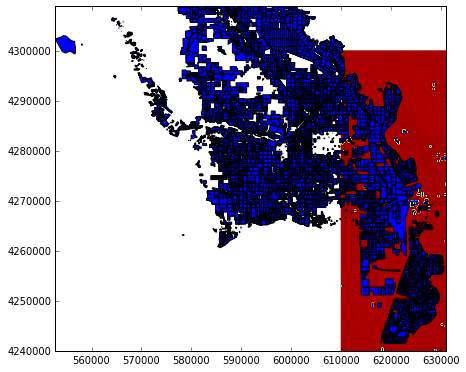

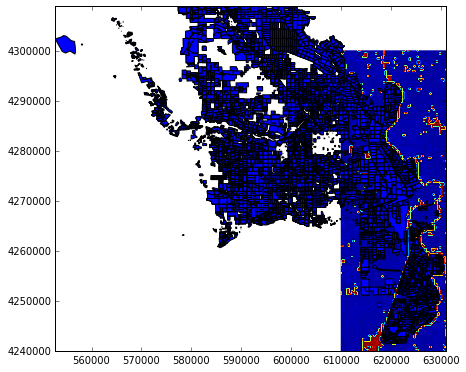

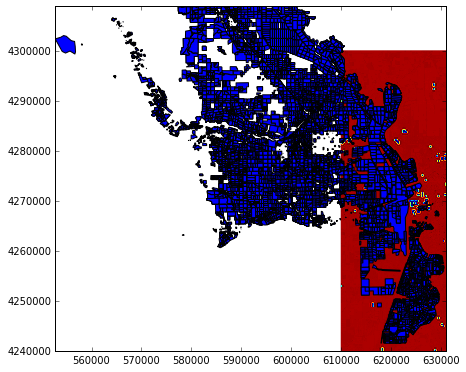

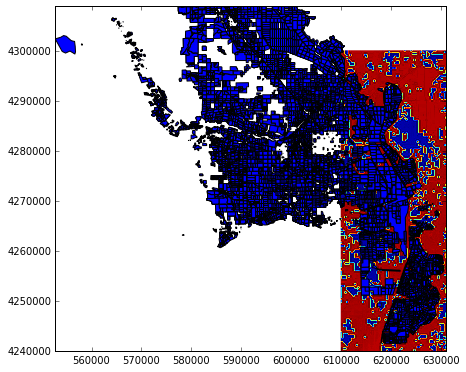

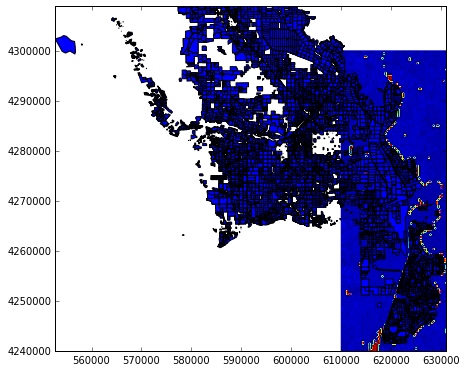

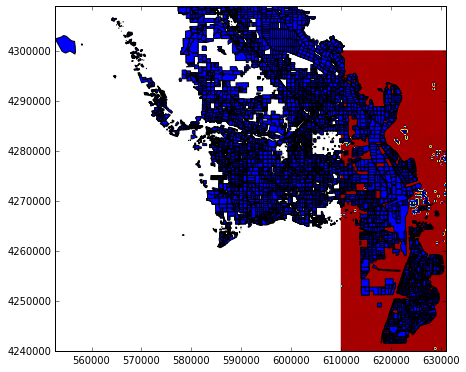

In [85]:
j = 0
for i in correct_files:
    j +=1
    dataset.close()
    dataset = rasterio.open(i)
    out_image, out_transform = mask(dataset,bbox,crop = True)
    trans = (out_transform[2], dataset.transform[1], dataset.transform[2],out_transform[5], dataset.transform[4], dataset.transform[5] )

    p = dataset.profile
    p.update({'height':out_image.shape[1],'width':out_image.shape[2],'affine':out_transform,'transform':trans})
    newname = str(j)+  i + 'tif'
    newname = newname.replace('jp2','')
    b = rasterio.open(newname, 'w', **a)
    b.write(out_image)
    b.close()

    x = rasterio.open(newname)
    print(x.bounds)



    fig,ax = plt.subplots(1,figsize=(7,7))
    bounds = rasterio.plot.plotting_extent(x)
    rasterio.plot.show(x,with_bounds=True, extent = bounds, ax=ax)
    cropshape.plot(ax = ax)

In [91]:
%cd IMG_DATA/

/shared/S2A_OPER_PRD_MSIL1C_PDMC_20160715T044318_R113_V20160714T190130_20160714T190130.SAFE/GRANULE/S2A_OPER_MSI_L1C_TL_MPS__20160714T235020_A005544_T10SFJ_N02.04/IMG_DATA


In [92]:
band2str = 'S2A_OPER_MSI_L1C_TL_MPS__20160714T235020_A005544_T10SFJ_B02.jp2'
band2 = rasterio.open(band2str)
band2.bounds
bbox = [{'type':'Polygon','coordinates':[[(631000,4310040),(609780,4310040),(609780,4300020),(631000,4300020)]]}]
from os import listdir
files = listdir()
def xmler(i):
    return('xml' not in i)
xmler(files[1])
import numpy as np
correct_files = np.array(files)[np.array(list(map(xmler,files)))]
correct_files
dataset = band2

In [95]:
out_image, out_transform = mask(band2,bbox,crop = True)
trans = (out_transform[2], band2.transform[1], band2.transform[2],out_transform[5], band2.transform[4], band2.transform[5])
a = band2.profile
a.update({'height':out_image.shape[1],'width':out_image.shape[2],'affine':out_transform,'transform':trans})

/home/rus/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2963: FutureWarning: The value of this property will change in version 1.0. Please see https://github.com/mapbox/rasterio/issues/86 for details.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
j = 0
for i in correct_files:
    j +=1
    dataset.close()
    dataset = rasterio.open(i)
    out_image, out_transform = mask(dataset,bbox,crop = True)
    trans = (out_transform[2], dataset.transform[1], dataset.transform[2],out_transform[5], dataset.transform[4], dataset.transform[5] )

    p = dataset.profile
    p.update({'height':out_image.shape[1],'width':out_image.shape[2],'affine':out_transform,'transform':trans})
    newname = str(j)+  i + 'tif'
    newname = newname.replace('jp2','')
    b = rasterio.open(newname, 'w', **a)
    b.write(out_image)
    b.close()

    x = rasterio.open(newname)
    print(x.bounds)



    fig,ax = plt.subplots(1,figsize=(7,7))
    bounds = rasterio.plot.plotting_extent(x)
    rasterio.plot.show(x,with_bounds=True, extent = bounds, ax=ax)
    cropshape.plot(ax = ax)

/home/rus/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2963: FutureWarning: The value of this property will change in version 1.0. Please see https://github.com/mapbox/rasterio/issues/86 for details.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.5/dist-packages/rasterio/__init__.py:160: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  transform = guard_transform(transform)


BoundingBox(left=609780.0, bottom=4300020.0, right=631000.0, top=4310040.0)
BoundingBox(left=609780.0, bottom=4300020.0, right=631000.0, top=4310040.0)
BoundingBox(left=609780.0, bottom=4300020.0, right=631000.0, top=4310040.0)
BoundingBox(left=609780.0, bottom=4300020.0, right=631000.0, top=4310040.0)
BoundingBox(left=609780.0, bottom=4300020.0, right=631000.0, top=4310040.0)
BoundingBox(left=609780.0, bottom=4300020.0, right=631000.0, top=4310040.0)
BoundingBox(left=609780.0, bottom=4300020.0, right=631000.0, top=4310040.0)
BoundingBox(left=609780.0, bottom=4300020.0, right=631000.0, top=4310040.0)
BoundingBox(left=609780.0, bottom=4300020.0, right=631000.0, top=4310040.0)
BoundingBox(left=609780.0, bottom=4300020.0, right=631000.0, top=4310040.0)
BoundingBox(left=609780.0, bottom=4300020.0, right=631000.0, top=4310040.0)
